# **1. Introduction 👋**

This study automates personal loan prediction in the financial sector using ML and DL models, including XGBoost, CatBoost, and LightGBM, achieving 99.20% accuracy with fair, interpretable, data-driven results.

Problem Statement 🤔
---
Traditional manual loan assessment methods are time-consuming and error-prone. Existing models struggle with large, imbalanced datasets and lack explainability. Hence, a robust ensemble DL+ML model is needed for higher performance.

# install and import some importance libraries



In [ ]:
!pip install catboost scikit-learn pandas numpy matplotlib seaborn tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import mode
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# Load and reading Data Set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/load-prediction/bankloan.csv')

In [ ]:
df.columns = [col.replace('.', '_') for col in df.columns]

In [ ]:
# null value check
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("Warning: Missing values detected.")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found (confirmed).")

No missing values found (confirmed).


 # Distribution of Numerical Variable

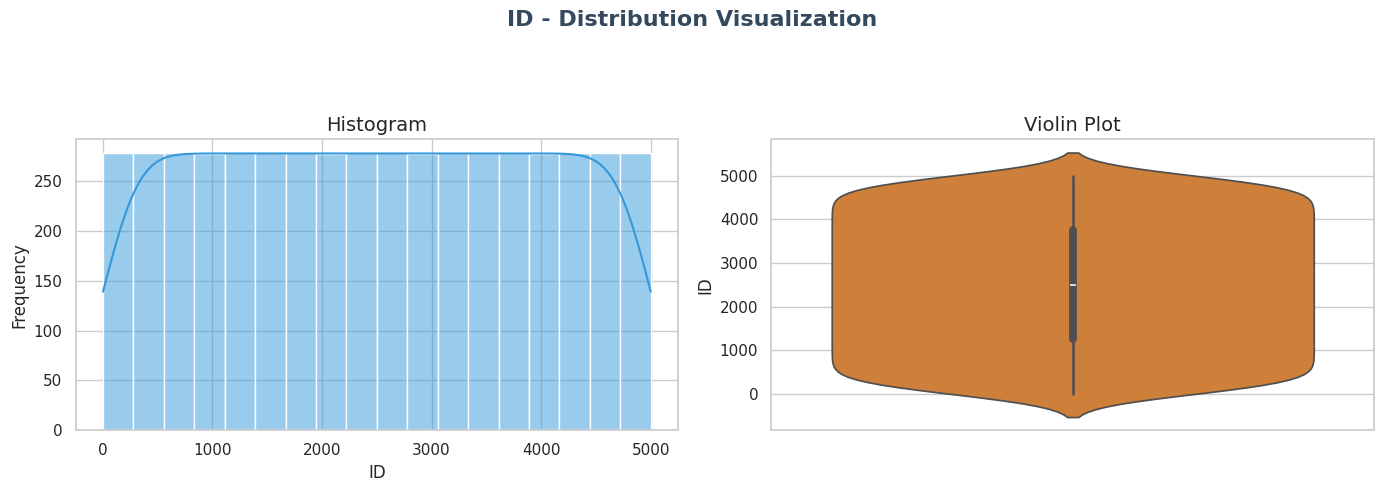

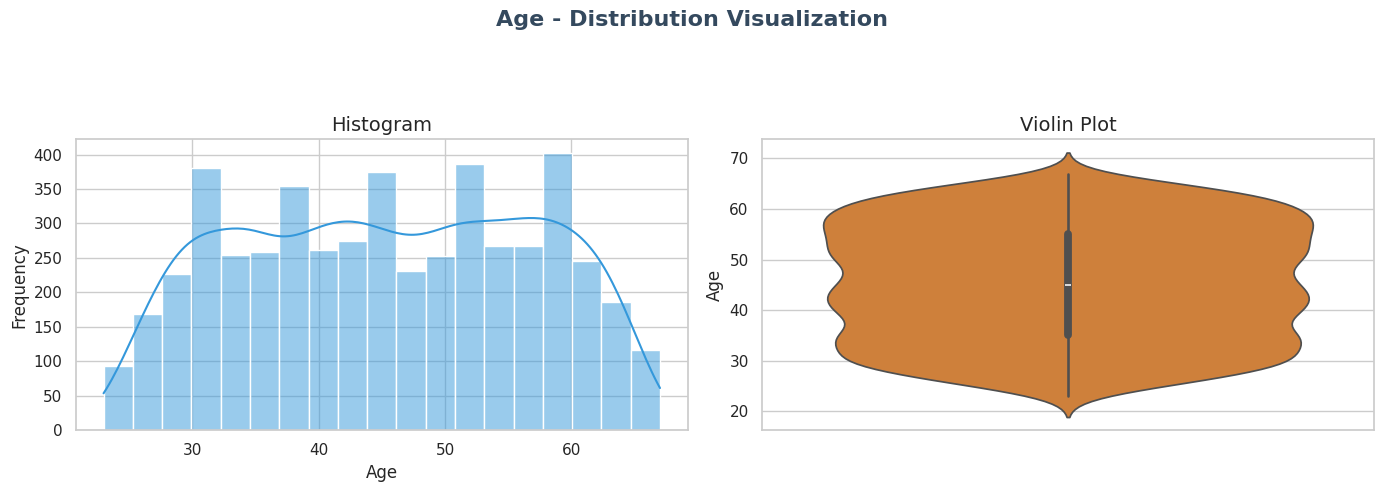

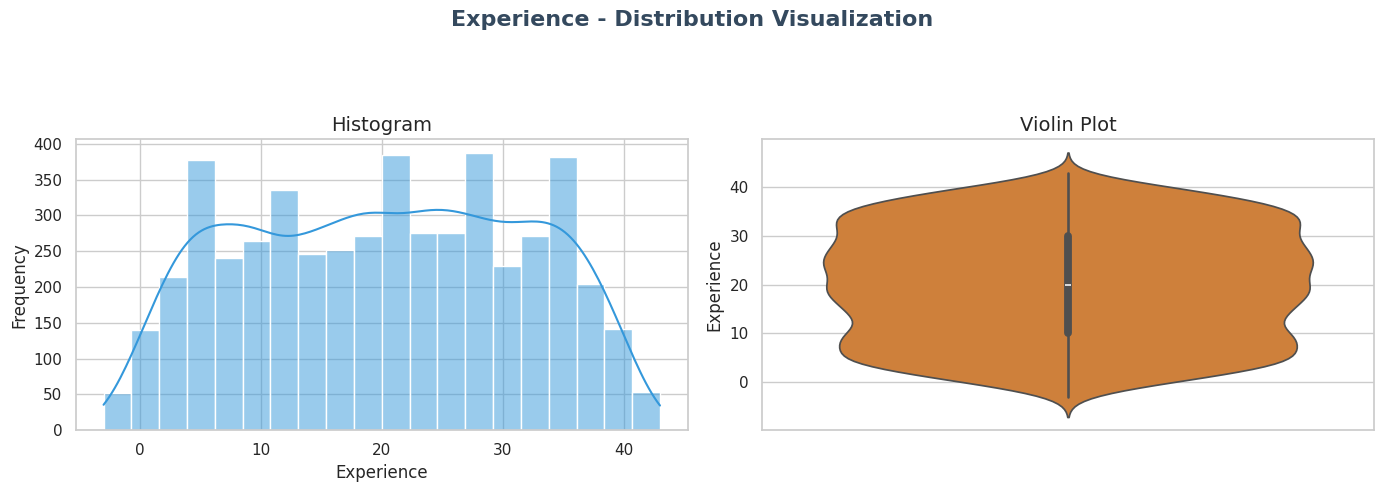

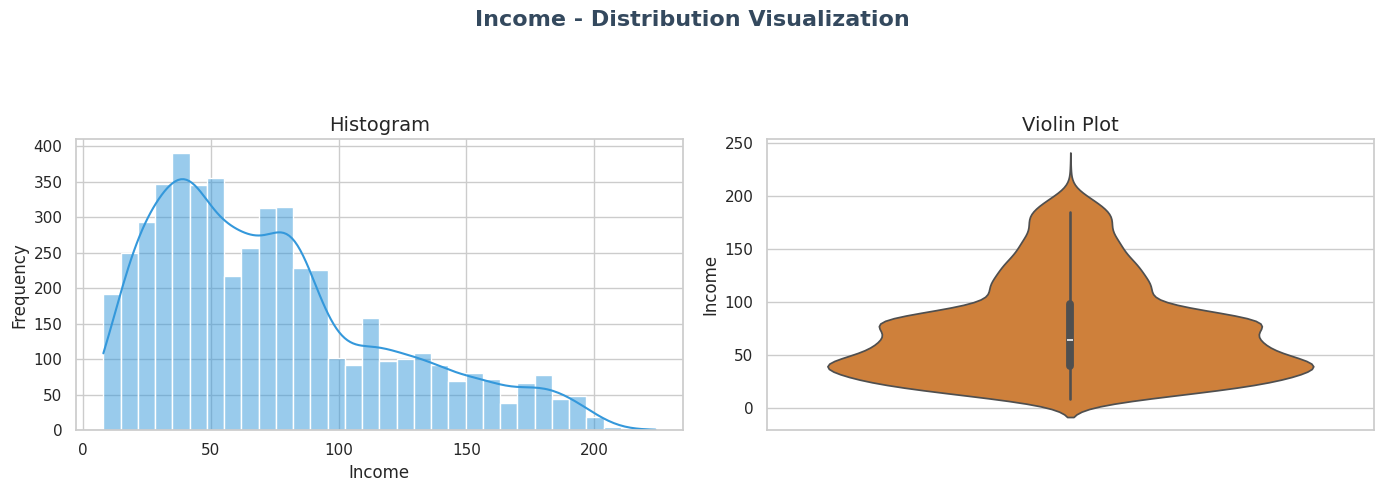

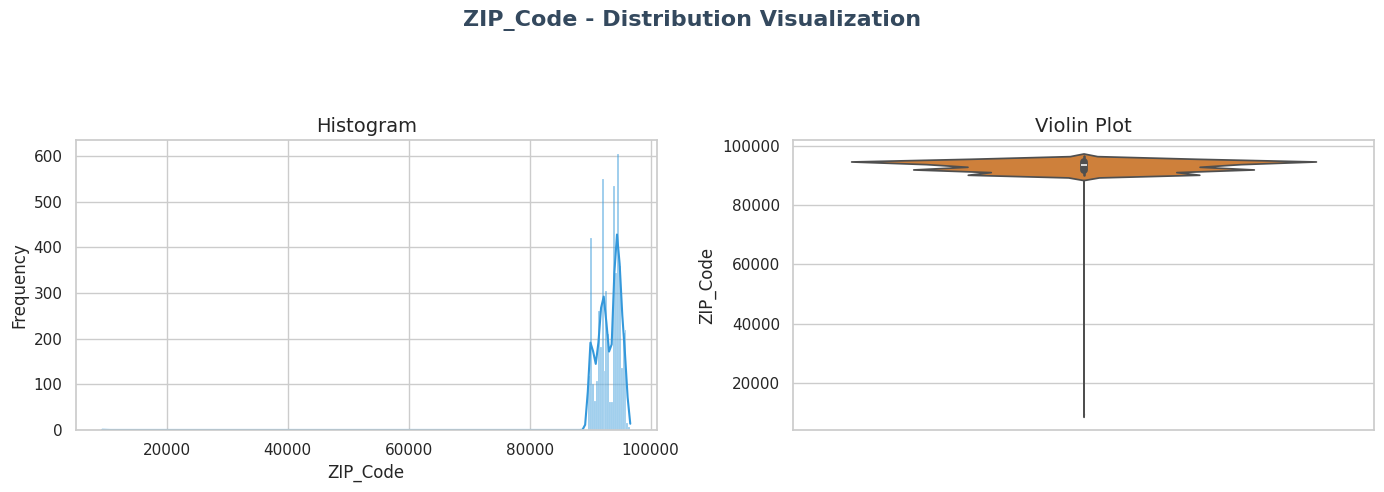

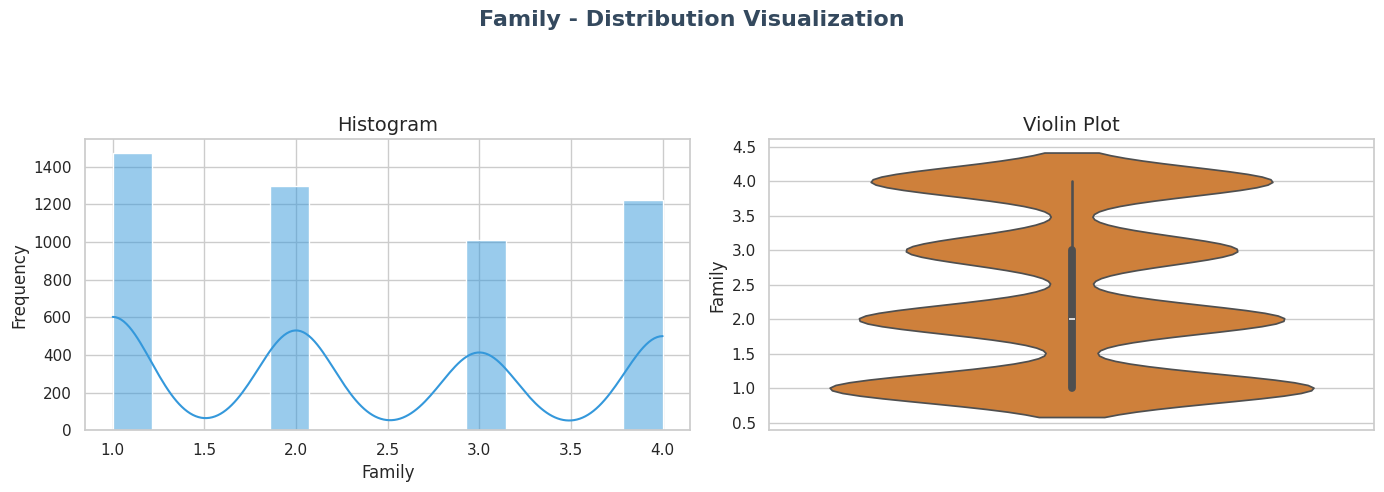

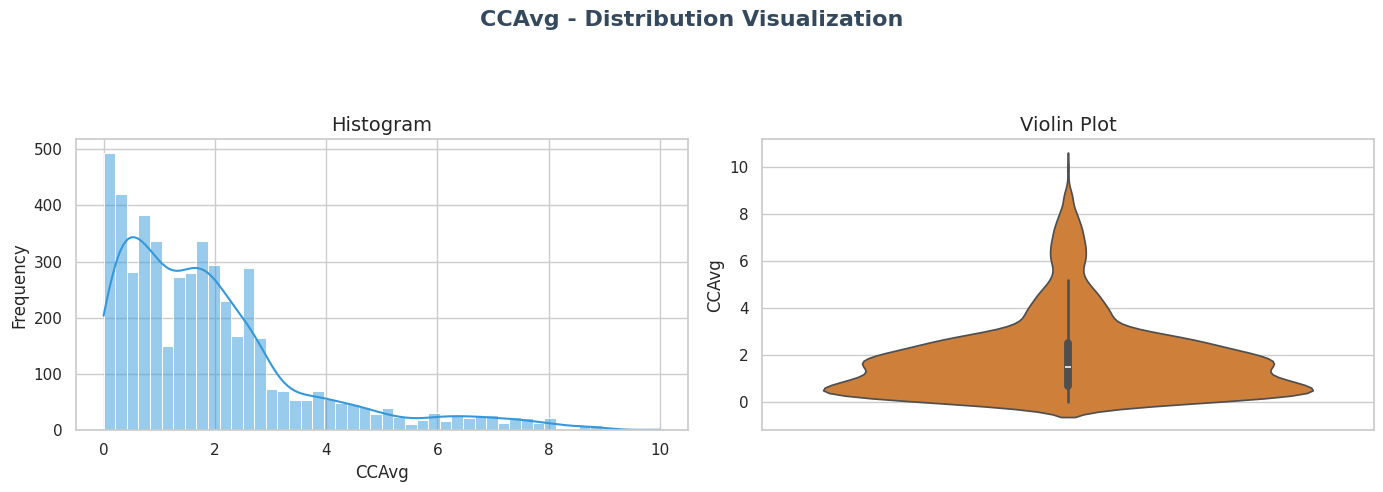

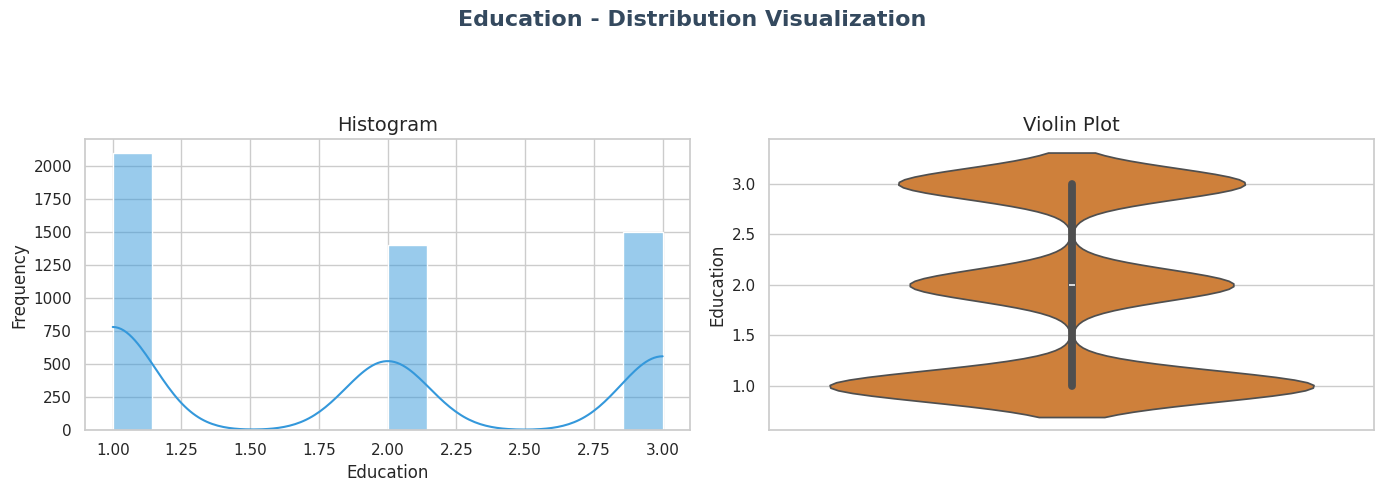

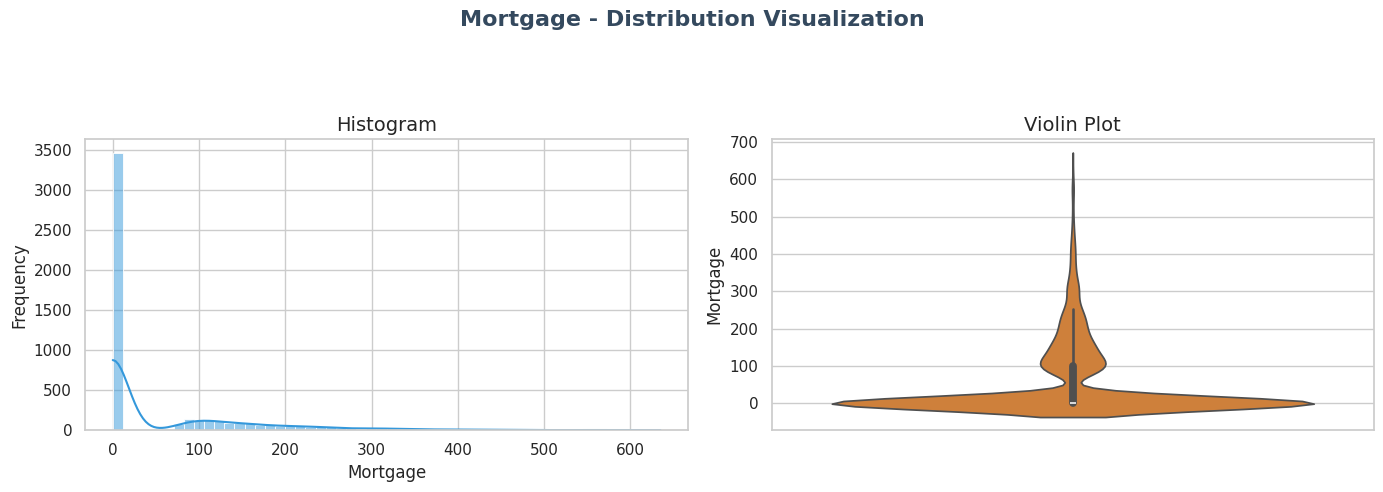

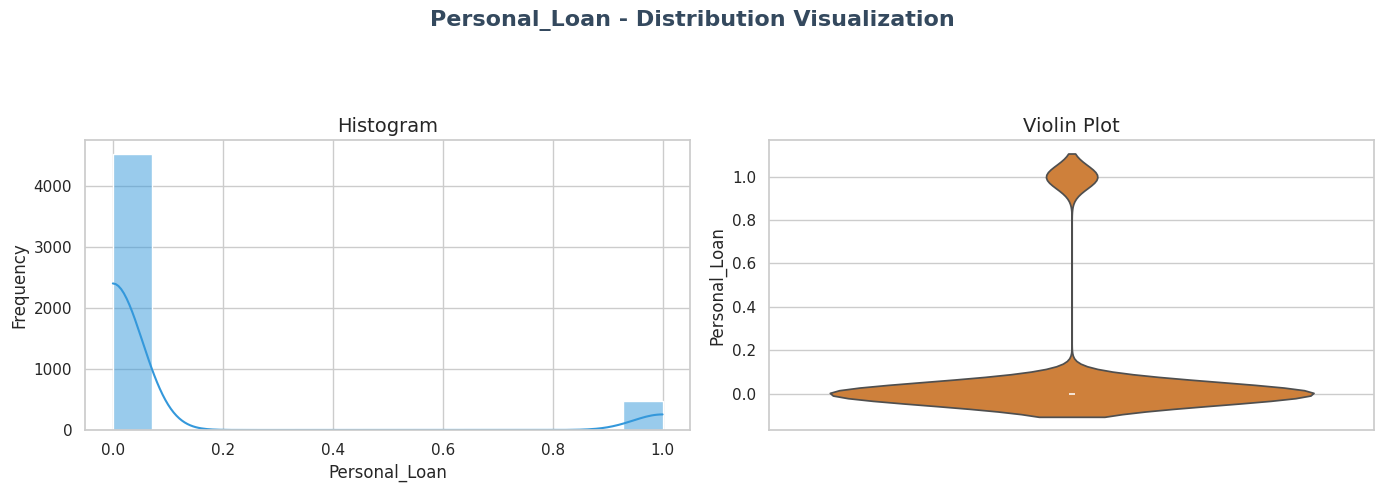

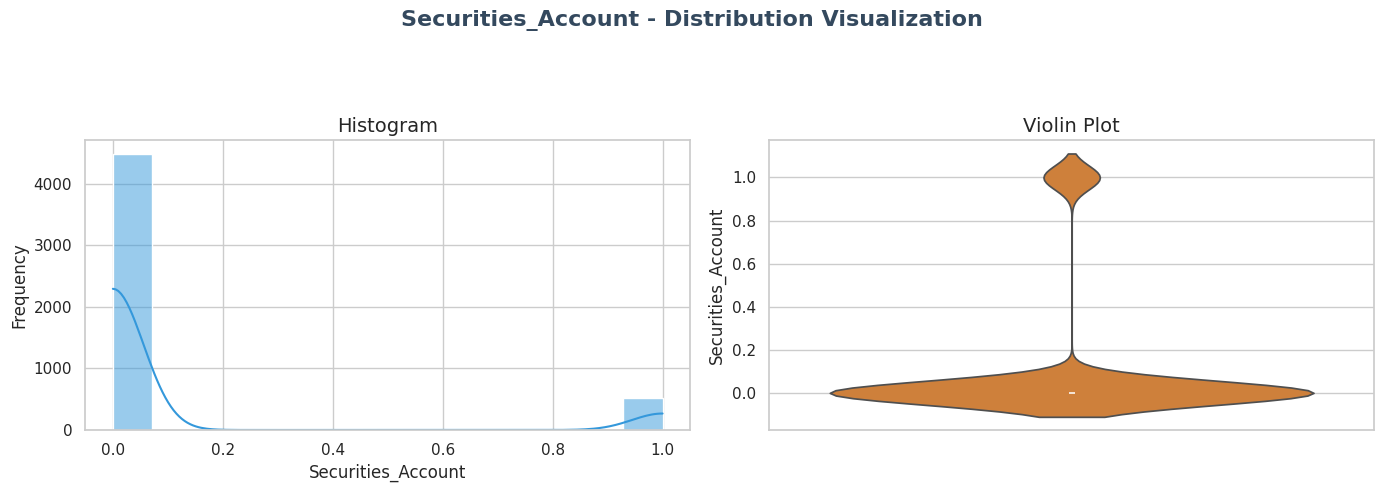

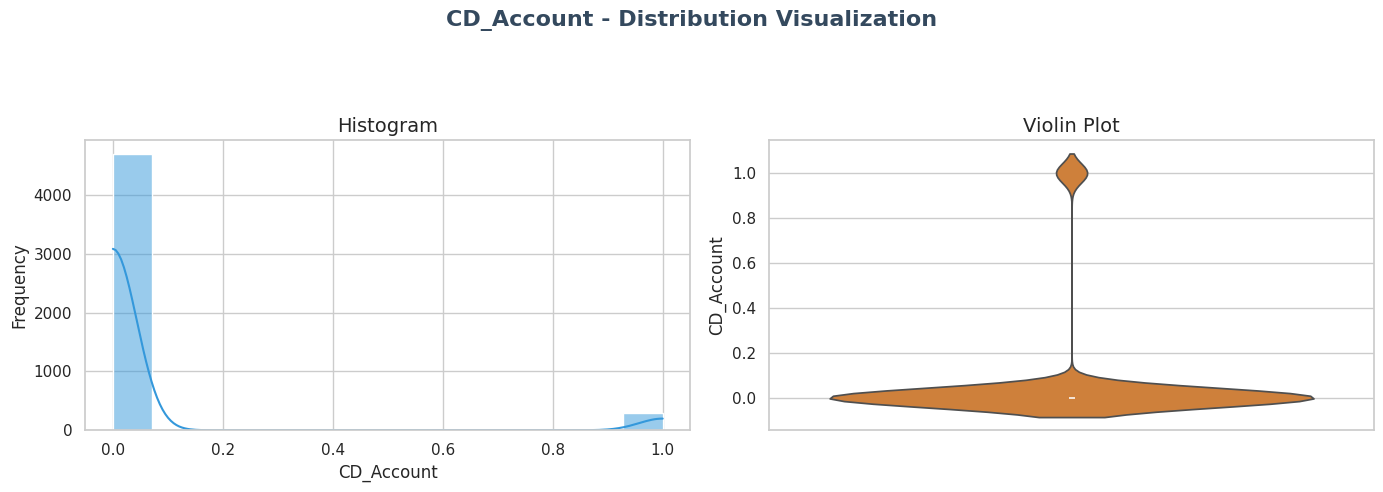

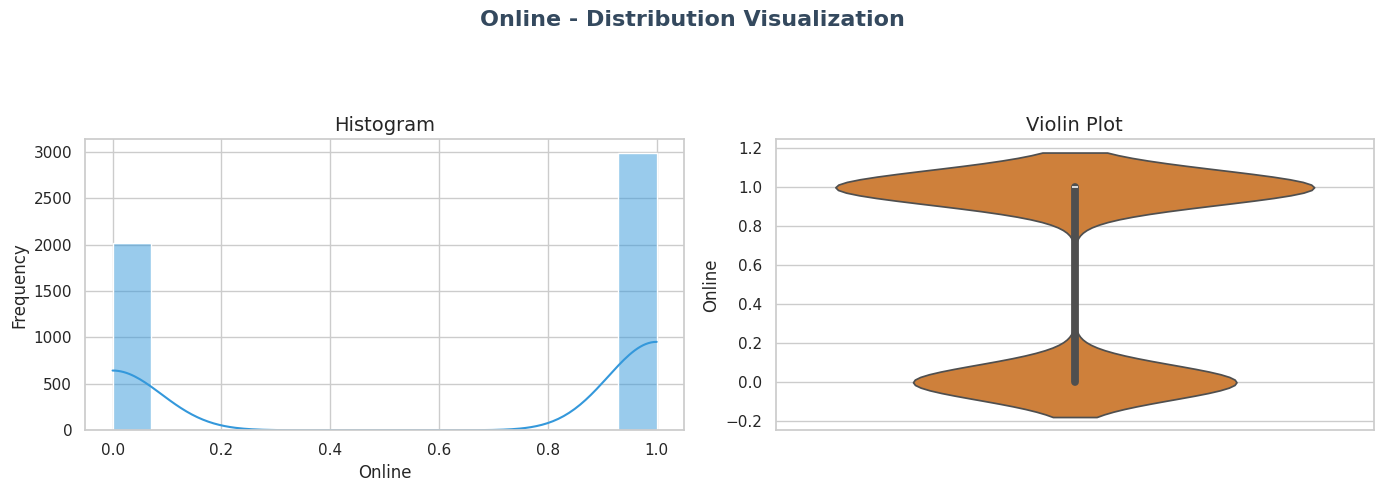

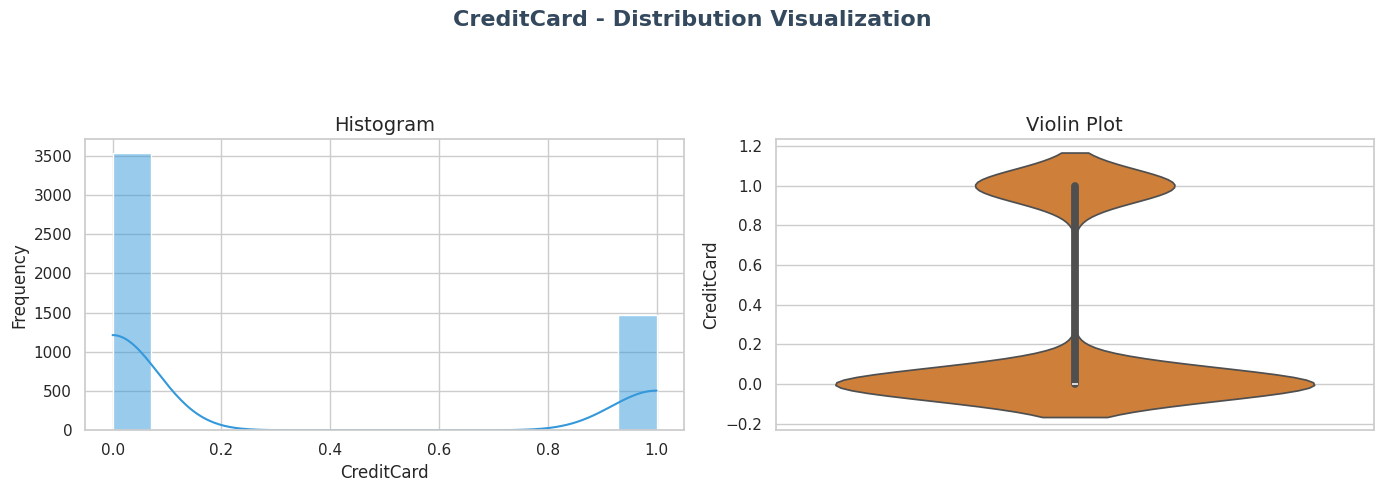

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Identify numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Histogram + Violin plot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(14, 5))
    plt.suptitle(f'{col} - Distribution Visualization', fontsize=16, fontweight='bold', color='#34495e')

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='#3498db')
    plt.title("Histogram", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Violin Plot
    plt.subplot(1, 2, 2)
    sns.violinplot(y=df[col], color='#e67e22')
    plt.title("Violin Plot", fontsize=14)
    plt.ylabel(col)

    plt.tight_layout(rect=[0, 0, 1, 0.88])
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

df['Experience'] = df['Experience'].apply(lambda x: np.nan if x < 0 else x)
df['Experience'].fillna(df['Experience'].median(), inplace=True)

imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

cols_to_scale = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

# MinMax Scaling
minmax_scaled = df_imputed.copy()
minmax_scaled[cols_to_scale] = MinMaxScaler().fit_transform(minmax_scaled[cols_to_scale])

# Standard Scaling
standard_scaled = df_imputed.copy()
standard_scaled[cols_to_scale] = StandardScaler().fit_transform(standard_scaled[cols_to_scale])

# Robust Scaling
robust_scaled = df_imputed.copy()
robust_scaled[cols_to_scale] = RobustScaler().fit_transform(robust_scaled[cols_to_scale])



/tmp/ipython-input-1555175637.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Experience'].fillna(df['Experience'].median(), inplace=True)


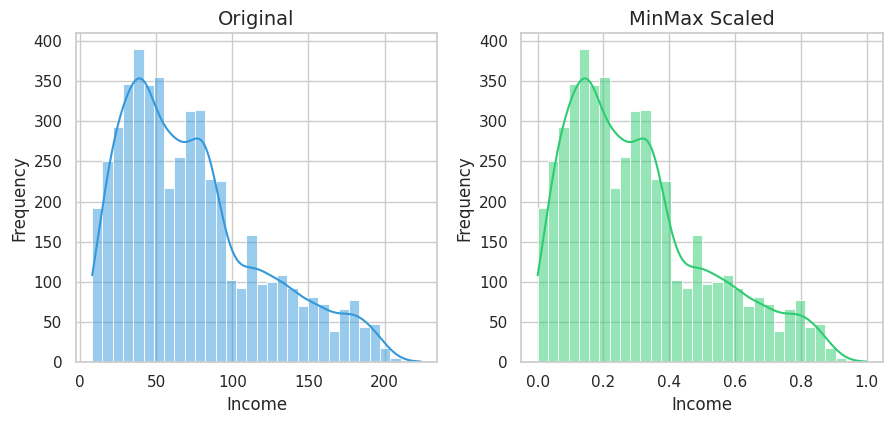

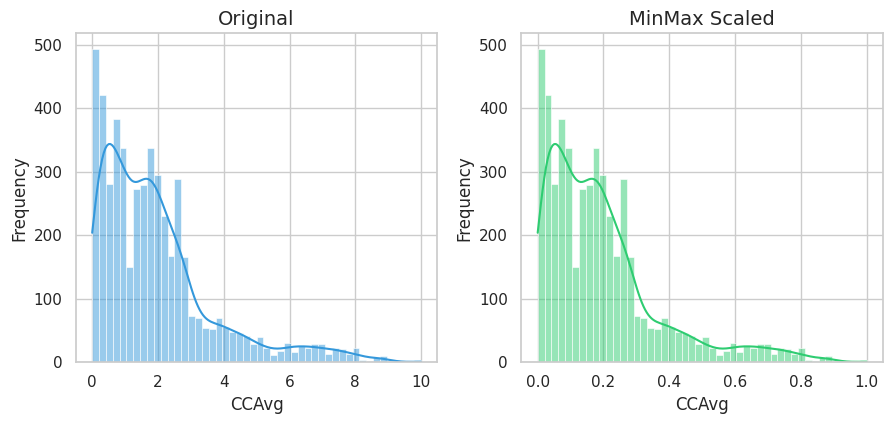

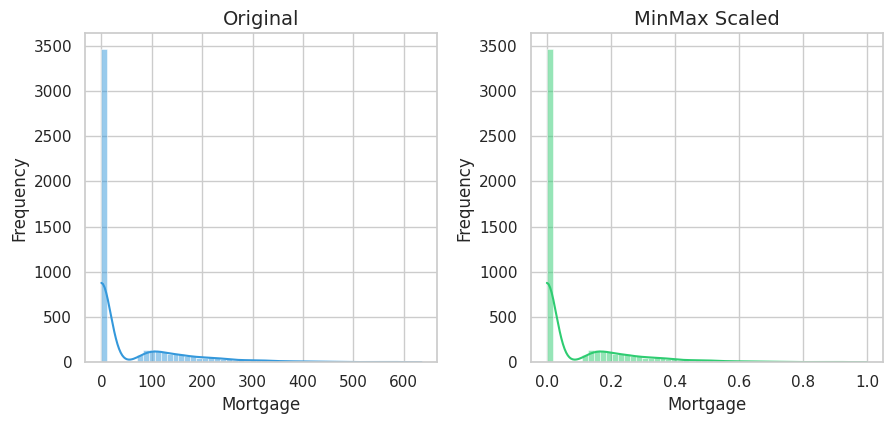

In [ ]:
# Improved Visualization: Separate and Clean for Each Feature

sns.set(style="whitegrid")
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']

def plot_scaling_comparison(feature, original, minmax, standard, robust):
    plt.figure(figsize=(18, 5))

    # Original
    plt.subplot(1, 4, 1)
    sns.histplot(original, kde=True, color=colors[0])
    plt.title("Original", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    # MinMax
    plt.subplot(1, 4, 2)
    sns.histplot(minmax, kde=True, color=colors[1])
    plt.title("MinMax Scaled", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    plt.tight_layout(rect=[0, 0, 1, 0.88])
    plt.show()


# Plot for Income
plot_scaling_comparison(
    'Income',
    df['Income'],
    minmax_scaled['Income'],
    standard_scaled['Income'],
    robust_scaled['Income']
)

# Plot for CCAvg
plot_scaling_comparison(
    'CCAvg',
    df['CCAvg'],
    minmax_scaled['CCAvg'],
    standard_scaled['CCAvg'],
    robust_scaled['CCAvg']
)

# Plot for Mortgage
plot_scaling_comparison(
    'Mortgage',
    df['Mortgage'],
    minmax_scaled['Mortgage'],
    standard_scaled['Mortgage'],
    robust_scaled['Mortgage']
)


In [ ]:
# Encode categorical variables
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

X = df.drop(['ZIP_Code', 'Personal_Loan', 'ID'], axis=1)
y = df['Personal_Loan']  # target variable

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train:")
print(X_train[:5])

print("\nX_test:")
print(X_test[:5])

print("\ny_train:")
print(y_train[:5])

print("\ny_test:")
print(y_test[:5])


X_train:
[[-1.1637042  -1.18447446  0.80874445 -1.21685513  1.06556728 -1.04907792
  -0.55552393  2.92891517 -0.25354028 -1.21661774 -0.64531434]
 [-0.55299157 -0.65123166 -0.12544666  0.52599094  0.09274018 -1.04907792
  -0.55552393  2.92891517 -0.25354028  0.82195086 -0.64531434]
 [-1.25094887 -1.18447446  2.15571768 -1.21685513  2.32452001 -1.04907792
  -0.55552393 -0.34142334 -0.25354028  0.82195086 -0.64531434]
 [ 0.40669972  0.41525394 -1.21171539 -1.21685513 -0.88008692  1.33248376
  -0.55552393 -0.34142334 -0.25354028  0.82195086 -0.64531434]
 [ 1.45363567  1.48173955 -0.92928552  0.52599094 -0.99453717 -1.04907792
  -0.55552393 -0.34142334 -0.25354028  0.82195086 -0.64531434]]

X_test:
[[-1.33819353 -1.45109586 -0.84238402 -0.34543209 -0.93731205  0.14170292
  -0.55552393  2.92891517 -0.25354028 -1.21661774  1.54963239]
 [ 0.14496573  0.23750634  1.63430869  1.39741398  2.38174513 -1.04907792
  -0.55552393 -0.34142334 -0.25354028 -1.21661774  1.54963239]
 [-1.33819353 -1.36222

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (4000, 11)
X_test shape: (1000, 11)
y_train shape: (4000,)
y_test shape: (1000,)


# Generate Visualizations

In [ ]:
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 # Set default dpi for better resolution

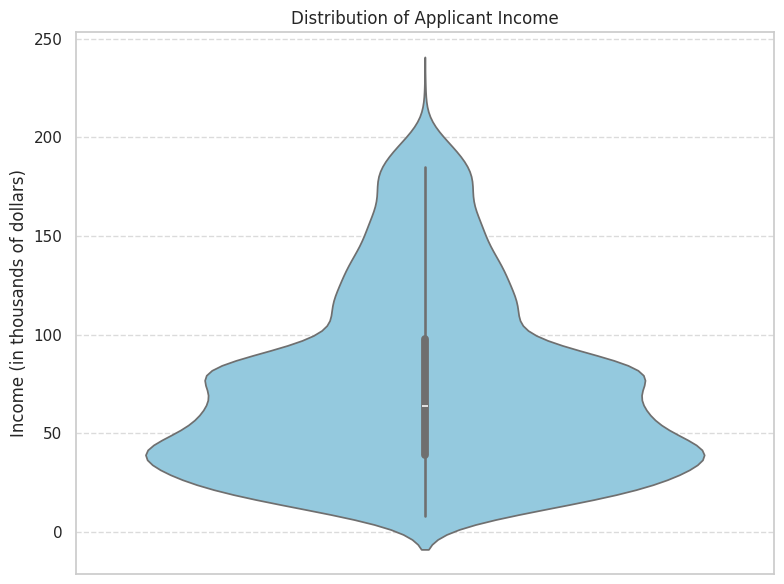

Generated Violin Plot for Applicant Income.


In [ ]:
# Figure 1: Violin Plot for Applicant Income (Income)
plt.figure(figsize=(8, 6))
sns.violinplot(y=df['Income'], color='skyblue')
plt.title('Distribution of Applicant Income')
plt.ylabel('Income (in thousands of dollars)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated Violin Plot for Applicant Income.")


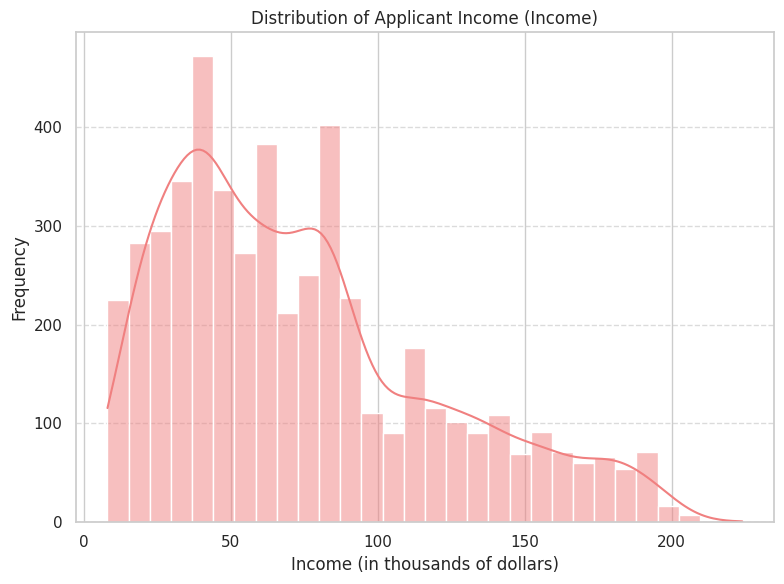

Generated Distribution Plot for Applicant Income.


In [ ]:
# Figure 2: Distribution Plot for Applicant Income
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], kde=True, bins=30, color='lightcoral')
plt.title('Distribution of Applicant Income (Income)')
plt.xlabel('Income (in thousands of dollars)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated Distribution Plot for Applicant Income.")


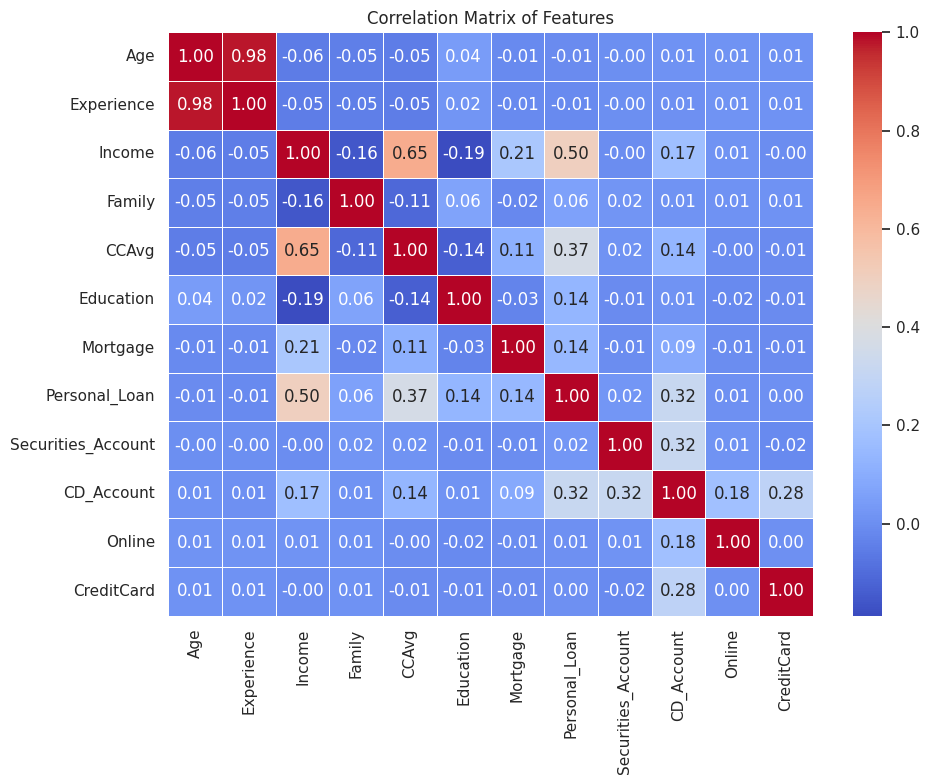

Generated Correlation Heatmap.


In [ ]:
# Figure 3: Correlation Heatmap
numerical_df = df.drop(columns=['ID', 'ZIP_Code'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()
print("Generated Correlation Heatmap.")


/tmp/ipython-input-727759121.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personal_Loan', y='Income', data=df, palette='viridis')


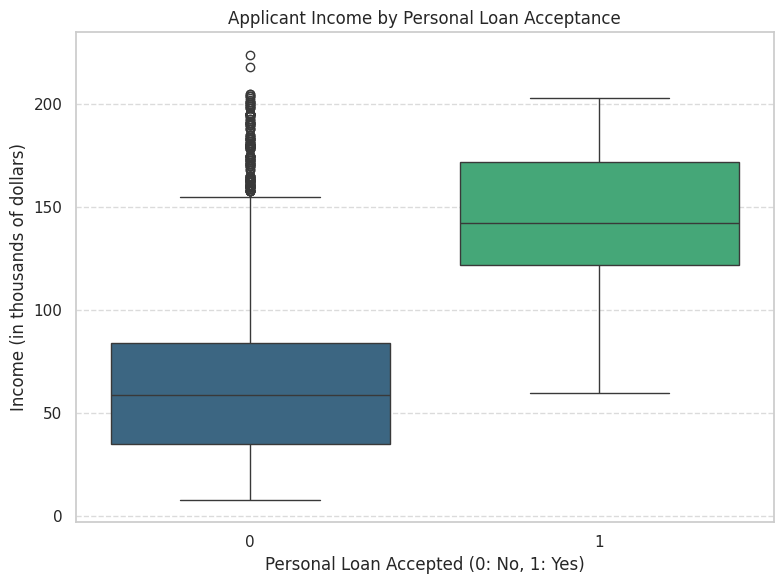

Generated Box Plot for Applicant Income by Loan Acceptance.


In [ ]:
# Figure 4: Box Plot for Applicant's Earnings and Loan Acceptance
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal_Loan', y='Income', data=df, palette='viridis')
plt.title('Applicant Income by Personal Loan Acceptance')
plt.xlabel('Personal Loan Accepted (0: No, 1: Yes)')
plt.ylabel('Income (in thousands of dollars)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated Box Plot for Applicant Income by Loan Acceptance.")


/tmp/ipython-input-2950900141.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Personal_Loan', data=df, palette='pastel')


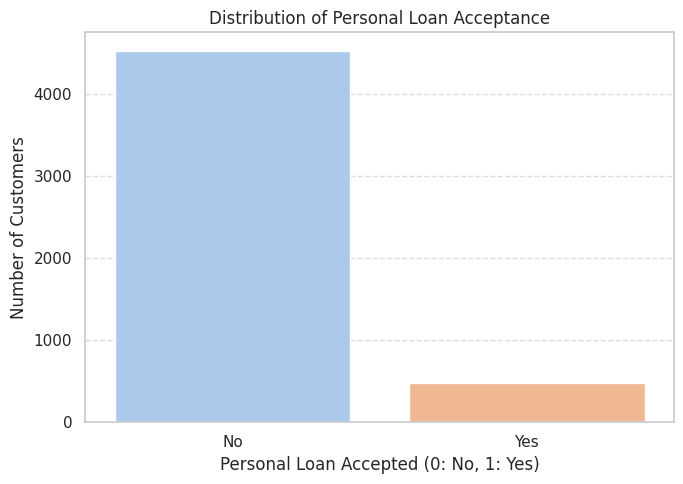

Generated Bar Plot for Loan Status Distribution.


In [ ]:
# Figure 5: Bar Plot for Loan Status Distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Personal_Loan', data=df, palette='pastel')
plt.title('Distribution of Personal Loan Acceptance')
plt.xlabel('Personal Loan Accepted (0: No, 1: Yes)')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Generated Bar Plot for Loan Status Distribution.")


#hard voting classifier with Random Forest and CatBoost

Accuracy: 0.9900
Precision: 0.9900
Recall: 0.9900
F1 Score: 0.9898

Confusion Matrix:
[[894   1]
 [  9  96]]


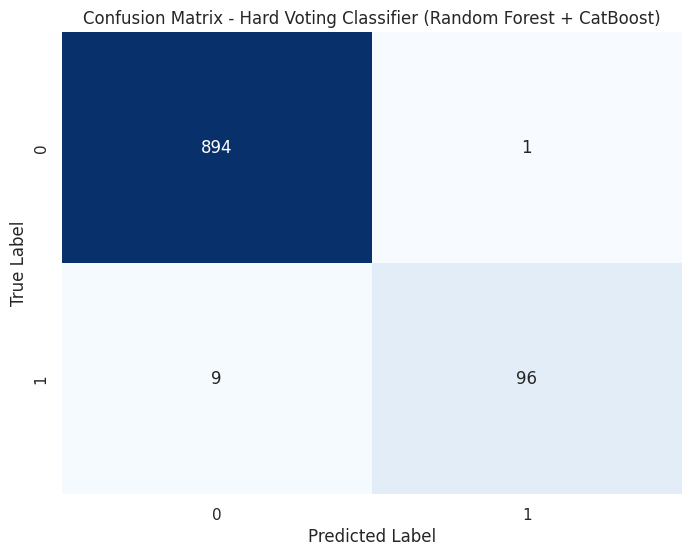


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.99      0.91      0.95       105

    accuracy                           0.99      1000
   macro avg       0.99      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the classifiers
rf_classifier = RandomForestClassifier(n_estimators=1100, random_state=1)
catboost_classifier = CatBoostClassifier(verbose=0, random_state=1)

# Create a hard voting classifier with Random Forest and CatBoost
voting_classifier = VotingClassifier(estimators=[
    ('random_forest', rf_classifier),
    ('catboost', catboost_classifier)], voting='hard')

# Train the hard voting classifier
voting_classifier.fit(X_train, y_train)

# Predicting the test set results using the voting classifier
y_pred_voting = voting_classifier.predict(X_test)

# Evaluating the model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')

# Confusion matrix
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Displaying the results
print(f'Accuracy: {accuracy_voting:.4f}')
print(f'Precision: {precision_voting:.4f}')
print(f'Recall: {recall_voting:.4f}')
print(f'F1 Score: {f1_voting:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix_voting)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Hard Voting Classifier (Random Forest + CatBoost)')
plt.show()

# Detailed classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_voting))

#Random forest

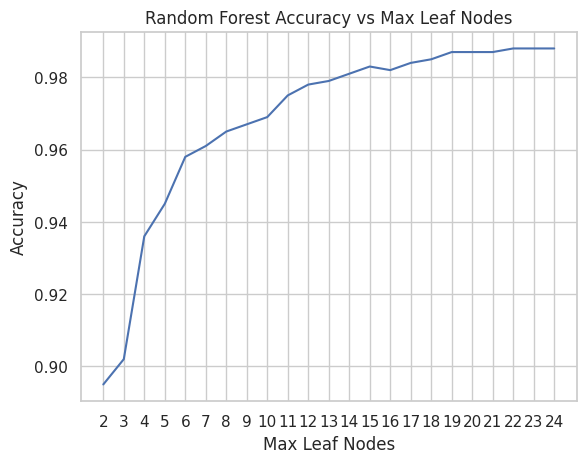

Best Random Forest Accuracy:  98.80%
Best max_leaf_nodes: 22
Accuracy: 0.9870
Precision: 0.9870
Recall: 0.9870
F1 Score: 0.9867

Confusion Matrix:
[[894   1]
 [ 12  93]]


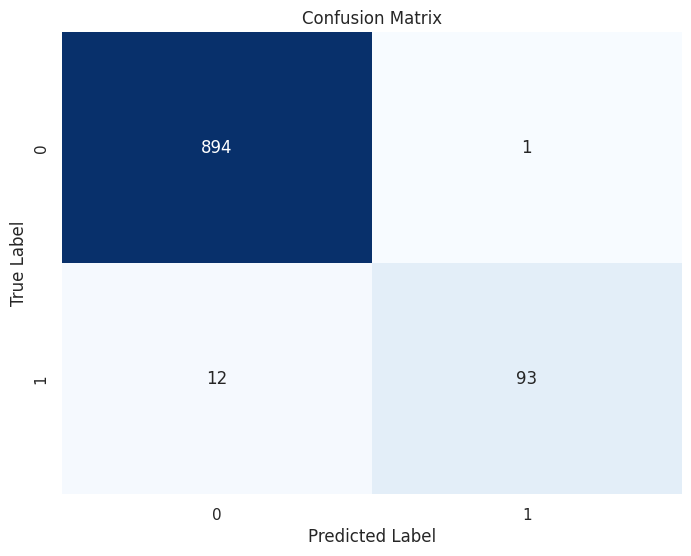


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.99      0.89      0.93       105

    accuracy                           0.99      1000
   macro avg       0.99      0.94      0.96      1000
weighted avg       0.99      0.99      0.99      1000



In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# List to store accuracy for different max_leaf_nodes values
scoreListRF = []

# Hyperparameter tuning for max_leaf_nodes
for i in range(2, 25):
    rf_classifier = RandomForestClassifier(n_estimators=1100, random_state=1, max_leaf_nodes=i)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scoreListRF.append(accuracy)

# Plot the accuracy for different max_leaf_nodes values
plt.plot(range(2, 25), scoreListRF)
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Max Leaf Nodes")
plt.show()

# Get the best accuracy and corresponding max_leaf_nodes
best_accuracy = max(scoreListRF)
best_max_leaf_nodes = range(2, 25)[scoreListRF.index(best_accuracy)]

# Display the best accuracy and the corresponding max_leaf_nodes
print("Best Random Forest Accuracy:  {:.2f}%".format(best_accuracy * 100))
print(f"Best max_leaf_nodes: {best_max_leaf_nodes}")

# Re-train the Random Forest classifier using the best max_leaf_nodes value
rf_classifier_best = RandomForestClassifier(n_estimators=1200, random_state=1, max_leaf_nodes=best_max_leaf_nodes)
rf_classifier_best.fit(X_train, y_train)

# Predicting the test set results using the best model
y_pred_best = rf_classifier_best.predict(X_test)

# Evaluating the model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Confusion matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Displaying the results
print(f'Accuracy: {accuracy_best:.4f}')
print(f'Precision: {precision_best:.4f}')
print(f'Recall: {recall_best:.4f}')
print(f'F1 Score: {f1_best:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix_best)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Detailed classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_best))


#Random Forest Accuracy Vs Max Left Nodes

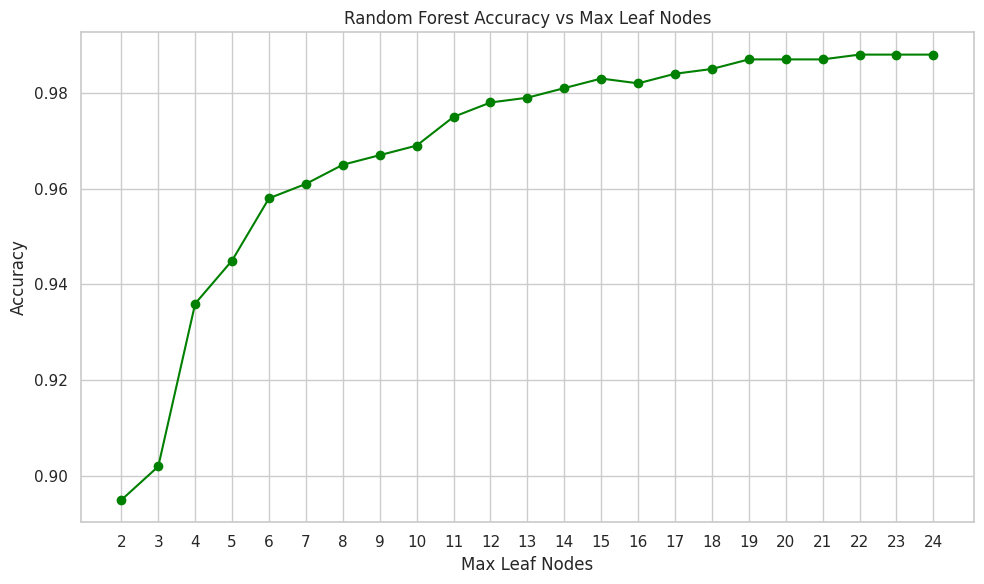

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the accuracy for different max_leaf_nodes values
plt.figure(figsize=(10, 6))
plt.plot(range(2, 25), scoreListRF, marker='o', linestyle='-', color='green')
plt.xticks(np.arange(2, 25, 1))
plt.xlabel("Max Leaf Nodes")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Max Leaf Nodes")
plt.grid(True)
plt.tight_layout()
plt.show()


#LSTM

Epoch 1/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8340 - loss: 0.6277 - val_accuracy: 0.9192 - val_loss: 0.4425
Epoch 2/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9100 - loss: 0.3870 - val_accuracy: 0.9267 - val_loss: 0.2359
Epoch 3/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9268 - loss: 0.2238 - val_accuracy: 0.9417 - val_loss: 0.1637
Epoch 4/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9410 - loss: 0.1735 - val_accuracy: 0.9625 - val_loss: 0.1273
Epoch 5/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9466 - loss: 0.1394 - val_accuracy: 0.9633 - val_loss: 0.1075
Epoch 6/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9605 - loss: 0.1073 - val_accuracy: 0.9700 - val_loss: 0.0950
Epoch 7/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9600 - loss: 0.1101 - val_accuracy: 0.9708 - val_loss: 0.0874
Epoch 8/200
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9672 - loss: 0.0930 - val_accuracy: 0.9750 

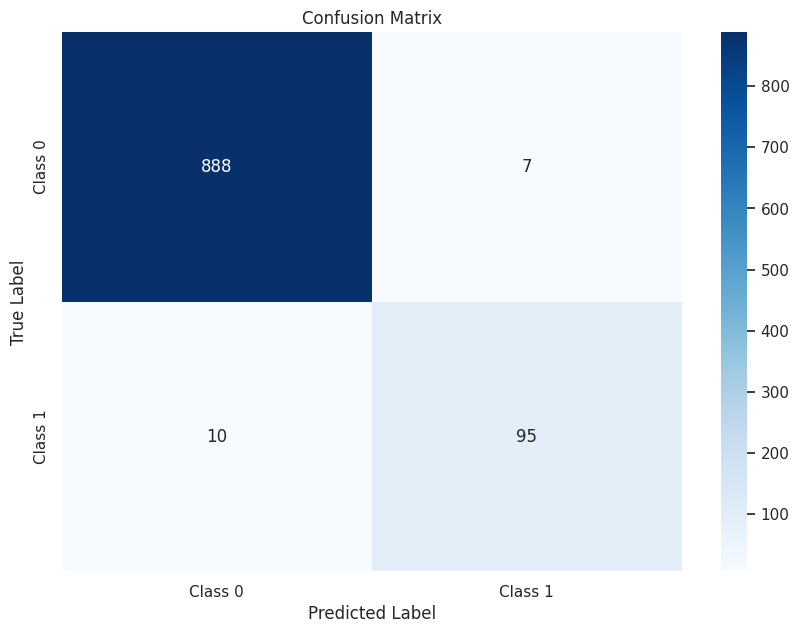

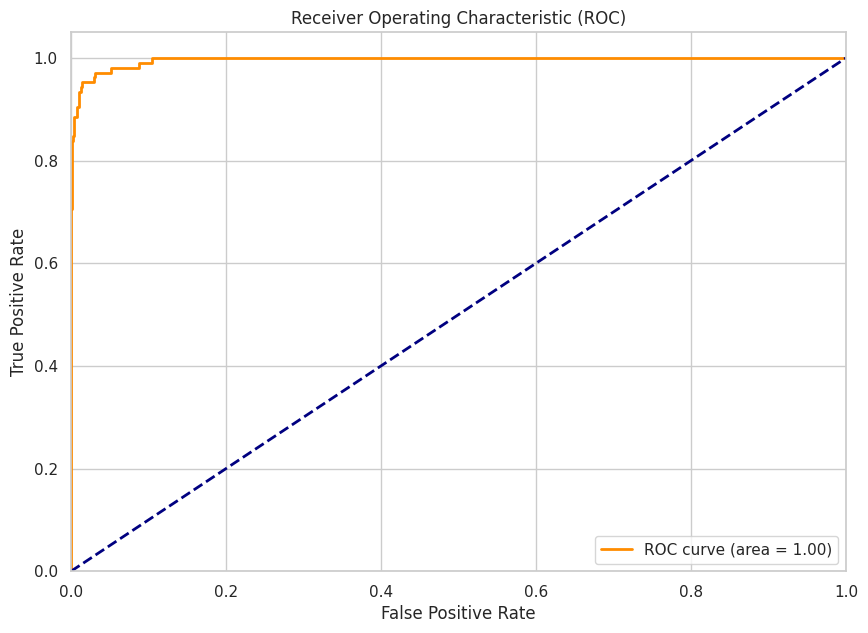

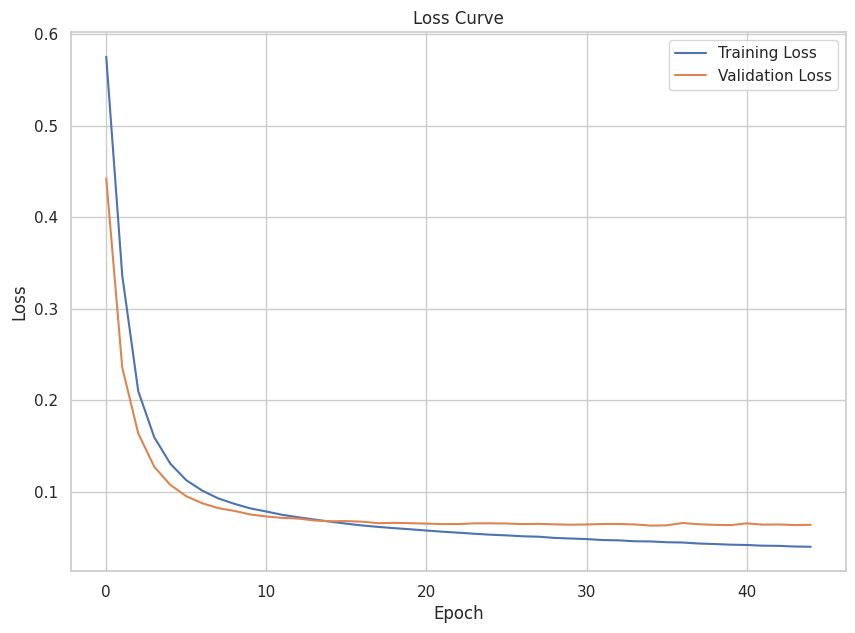

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM Model
model = Sequential()

model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.3, callbacks=[early_stopping], verbose=1)

# Evaluate model
y_pred_proba = model.predict(X_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Loss Validation Curve
plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


#LightGBM Classifier

In [ ]:
import warnings
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore", category=FutureWarning)

# Before fitting LightGBM, ensure X_train and X_test are 2D
# This is necessary because the previous cell reshaped them for LSTM
if X_train.ndim == 3:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[2]))
if X_test.ndim == 3:
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))


# STEP 2: Train LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
lgb_model.fit(X_train, y_train)

# STEP 3: Predict
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# STEP 4: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.9910
Precision: 0.9898
Recall: 0.9238
F1 Score: 0.9557


LightGBM Classifier Visualizations

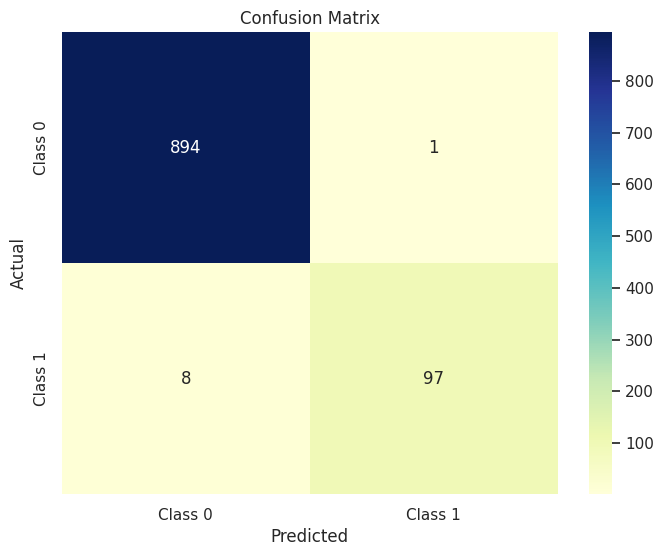

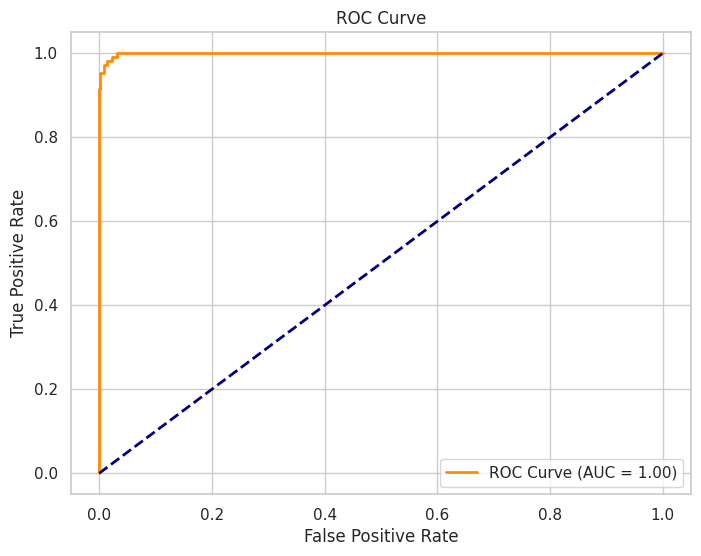

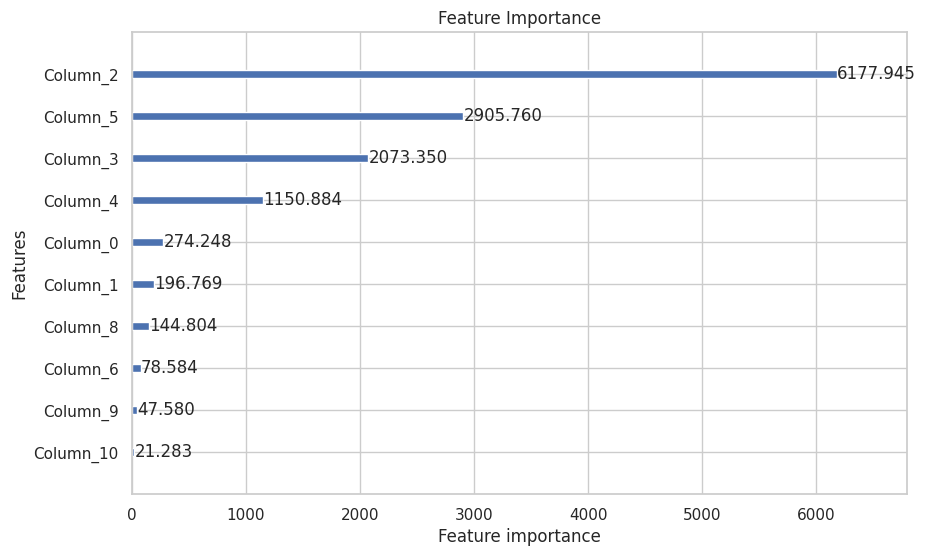

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='gain', figsize=(10, 6), title='Feature Importance')
plt.show()


#XGBoost + SHAP

In [ ]:
# STEP 1: Import required libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#STEP 2: Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

XGBoost Model Accuracy: 99.30%
Precision: 0.9804
Recall: 0.9524
F1 Score: 0.9662

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       895
           1       0.98      0.95      0.97       105

    accuracy                           0.99      1000
   macro avg       0.99      0.98      0.98      1000
weighted avg       0.99      0.99      0.99      1000



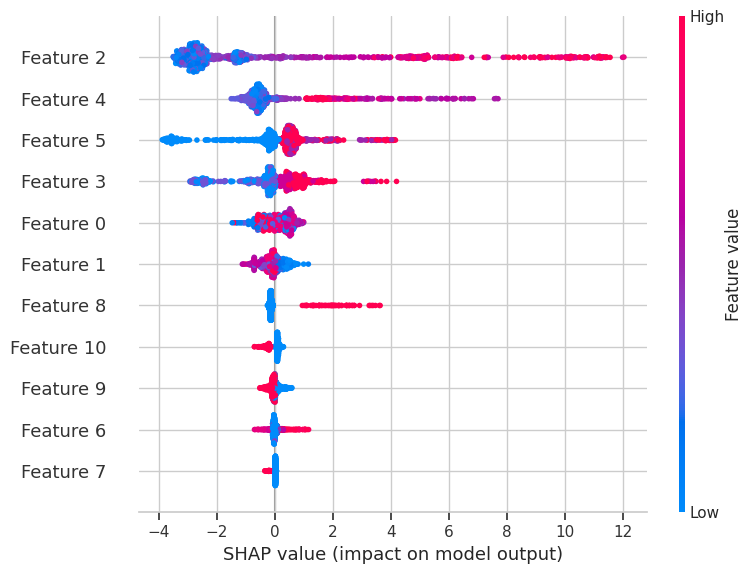

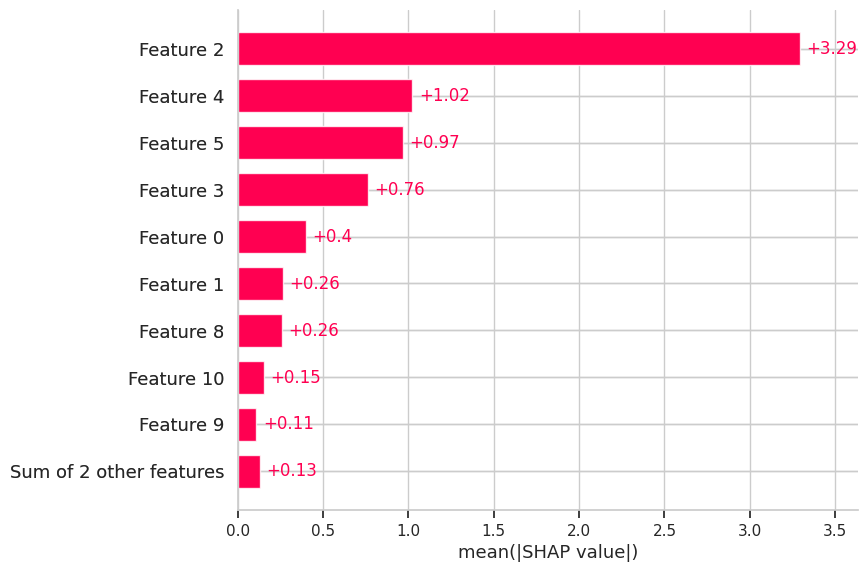

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
# STEP 3: Make predictions
y_pred = xgb_model.predict(X_test)

# STEP 4: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Model Accuracy: {accuracy * 100:.2f}%")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
# STEP 5: Optional - Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ==========================
# STEP 6: SHAP Explainability
# ==========================
import shap

# Initialize SHAP explainer (works best with tree-based models like XGBoost)
explainer = shap.Explainer(xgb_model, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)

# Summary plot - shows feature importance and direction
shap.summary_plot(shap_values, X_test)

# Optional: Bar plot of mean absolute SHAP value (overall feature importance)
shap.plots.bar(shap_values)

# Optional: Explain a single prediction (1st row)
# shap.plots.waterfall(shap_values[0])  # Detailed view for one sample
# shap.plots.force(shap_values[0])      # Interactive force plot (Jupyter only)


In [ ]:
!pip install lime

<Figure size 3600x2400 with 0 Axes>

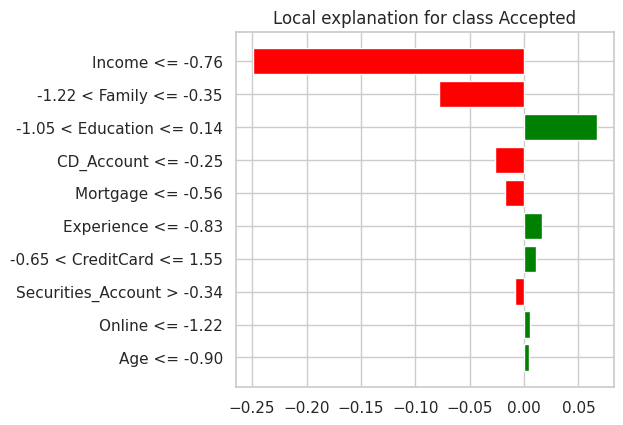


LIME Explanation for instance 0 visualized.
Top features contributing to the prediction:
- Income <= -0.76: -0.2490
- -1.22 < Family <= -0.35: -0.0785
- -1.05 < Education <= 0.14: 0.0669
- CD_Account <= -0.25: -0.0271
- Mortgage <= -0.56: -0.0176
- Experience <= -0.83: 0.0166
- -0.65 < CreditCard <= 1.55: 0.0107
- Securities_Account > -0.34: -0.0081
- Online <= -1.22: 0.0055
- Age <= -0.90: 0.0041


In [ ]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import numpy as np

# Ensure X_train and X_test are 2D numpy arrays for LIME
if isinstance(X_train, np.ndarray) and X_train.ndim == 3:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[2]))
if isinstance(X_test, np.ndarray) and X_test.ndim == 3:
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[2]))

# Re-initialize and train XGBoost if the data shape was changed
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Get feature names from the original DataFrame before scaling
feature_names = X.columns

# Create a LIME explainer
# Need to use original (or scaled but not reshaped) data for the explainer's training_data parameter
# Use scaled X_train and X_test for prediction and explanation
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=feature_names,
    class_names=['Not Accepted', 'Accepted'], # Assuming 0 is Not Accepted, 1 is Accepted
    mode='classification',
    random_state=42
)

# Choose an instance to explain (e.g., the first instance in the test set)
instance_idx = 0
instance_to_explain = X_test[instance_idx]

# Explain the instance
# num_features controls how many features are shown in the explanation
explanation = explainer_lime.explain_instance(
    data_row=instance_to_explain,
    predict_fn=xgb_model.predict_proba,
    num_features=10  # Display top 10 features contributing to the prediction
)

# Visualize the explanation
# Use a higher dpi for research paper quality
plt.figure(figsize=(12, 8), dpi=300) # Set figure size and dpi
explanation.as_pyplot_figure()
#plt.title(f'LIME Explanation for XGBoost Prediction (Instance {instance_idx})', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for the title
plt.show()

print(f"\nLIME Explanation for instance {instance_idx} visualized.")
print("Top features contributing to the prediction:")
for feature, weight in explanation.as_list():
    print(f"- {feature}: {weight:.4f}")

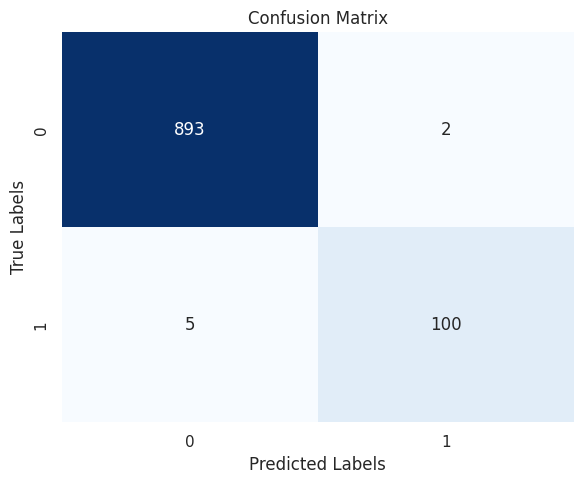

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# STEP 6: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()


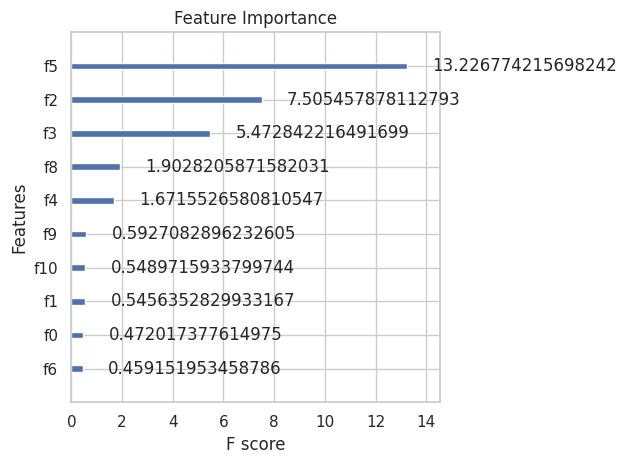

In [ ]:
# STEP 7: Plot feature importance (optional)
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain', title='Feature Importance')
plt.tight_layout()
plt.show()

0.993


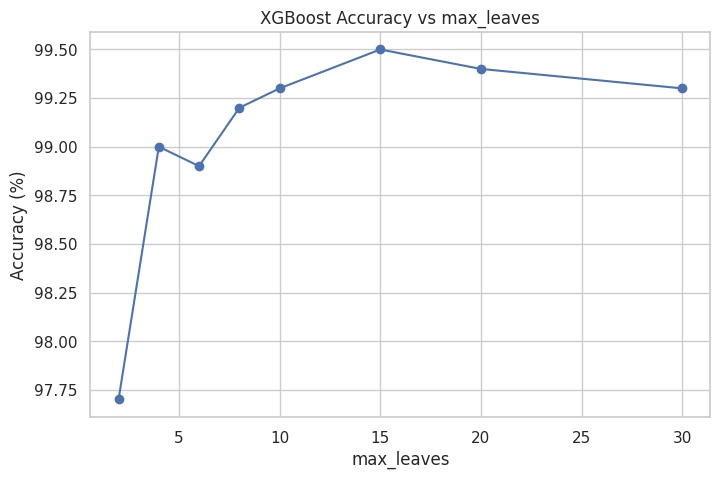

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

max_leaves_list = [2, 4, 6, 8, 10, 15, 20, 30]
accuracy_scores = []

for leaves in max_leaves_list:
    model = xgb.XGBClassifier(
        grow_policy='lossguide',
        max_leaves=leaves,
        tree_method='hist',  # faster for large data
        use_label_encoder=False,
        eval_metric='mlogloss'  # or 'logloss' depending on your use case
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# গ্রাফ আঁকা
print(acc)
plt.figure(figsize=(8, 5))
plt.plot(max_leaves_list, [a * 100 for a in accuracy_scores], marker='o')
plt.title("XGBoost Accuracy vs max_leaves")
plt.xlabel("max_leaves")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.show()


In [ ]:
# STEP 2: Initialize SHAP Explainer
explainer = shap.Explainer(model)

# STEP 3: Calculate SHAP values
shap_values = explainer(X_test)

# STEP 4: Summary Plot
shap.summary_plot(shap_values, X_test)

#CatBoost + SHAP + LIME

In [ ]:
!pip install lime
from catboost import CatBoostClassifier
import shap
from lime.lime_tabular import LimeTabularExplainer

CatBoost Model Accuracy: 99.00%

Classification Report:
              precision    recall  f1-score  support
0              0.990033  0.998883  0.994438   895.00
1              0.989691  0.914286  0.950495   105.00
accuracy       0.990000  0.990000  0.990000     0.99
macro avg      0.989862  0.956584  0.972467  1000.00
weighted avg   0.989997  0.990000  0.989824  1000.00


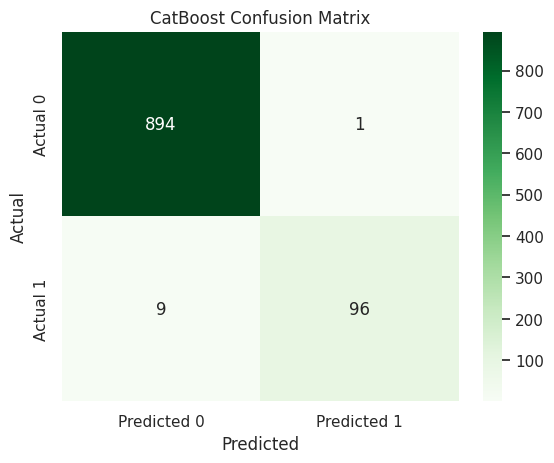

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 3: Train CatBoost Classifier
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Step 4: Predict
y_pred = cat_model.predict(X_test)

# Step 5: Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Model Accuracy: {accuracy * 100:.2f}%")

# Step 6: Classification Report (as dict)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)

# Optional: Save report
report_df.to_csv("catboost_classification_report.csv", index=True)

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


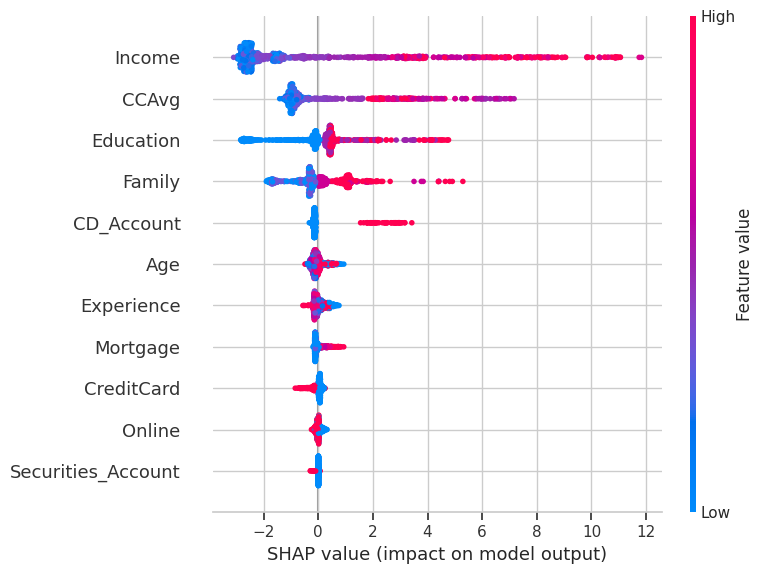

In [ ]:
# Step 4: SHAP Explainability
explainer = shap.Explainer(cat_model)
shap_values = explainer(X_test)
# X = df.drop(['ZIP_Code', 'Personal_Loan', 'ID'], axis=1)
# y = df['Personal_Loan']  # target variable

# Get the original column names before scaling and splitting
# This assumes that the order of columns is preserved during scaling and splitting
original_feature_names = X.columns
shap.summary_plot(shap_values, X_test, feature_names=original_feature_names)

In [ ]:
# ✅ Step 5: LIME Explainability
lime_explainer = LimeTabularExplainer(
    training_data=X_train,
    # Use the original feature names here
    feature_names=original_feature_names.tolist(), # Convert to list if needed by LIME
    class_names=['No', 'Yes'],
    mode='classification'
)

i = 5  # Example index
exp = lime_explainer.explain_instance(X_test[i], cat_model.predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Step 1: Train the model
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Step 2: Predict on test set
y_pred = cat_model.predict(X_test)

# Step 3: Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ CatBoost Model Accuracy: {accuracy * 100:.2f}%")

✅ CatBoost Model Accuracy: 99.00%


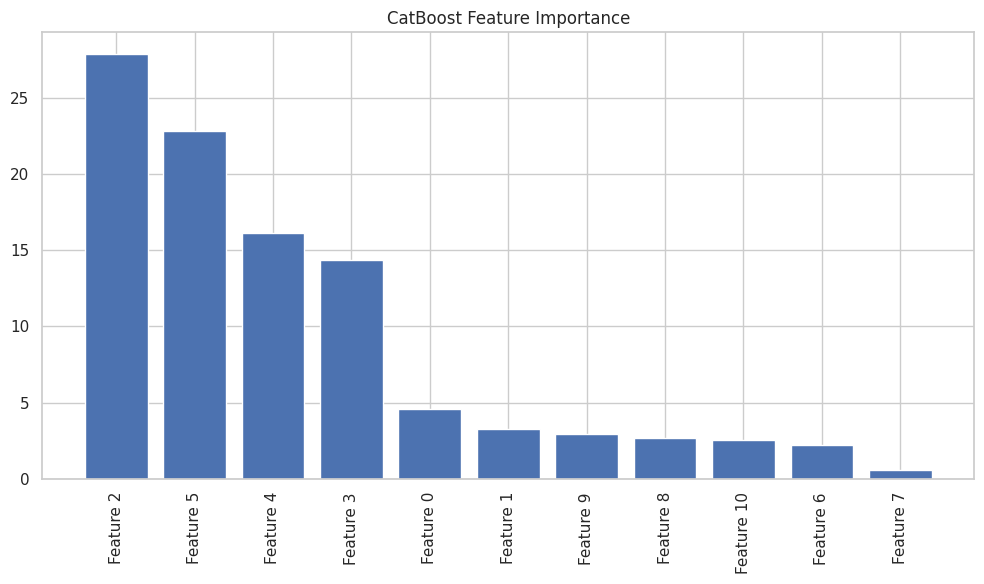

In [ ]:
# Get feature importance values
importances = cat_model.get_feature_importance()

# Get feature names from the training data
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(importances.shape[0])] # Use feature names from X_train if it's a DataFrame, otherwise use generic names

# Sort feature importance values and names
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.title("CatBoost Feature Importance")
plt.tight_layout()
plt.show()

#Hard Voting Classifier

**How it works:**

Each model makes a prediction (votes for a class).

The final prediction is the class that gets the majority of votes.

Example: If 2 out of 3 models predict "Yes", and 1 predicts "No", the final result is "Yes".

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Define base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, random_state=42)  # For soft voting if needed

# Step 2: Combine with Hard Voting
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('lr', lr),
    ('svm', svm)
], voting='hard')  # You can use 'soft' for Soft Voting

# Step 3: Train on data
voting_clf.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("============ hard Voting Classifier =========")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {prec * 100:.2f}%")
print(f"Recall: {rec * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

============ hard Voting Classifier =========
Accuracy: 98.40%
Precision: 98.43%
Recall: 98.40%
F1 Score: 98.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       904
           1       1.00      0.83      0.91        96

    accuracy                           0.98      1000
   macro avg       0.99      0.92      0.95      1000
weighted avg       0.98      0.98      0.98      1000



#Soft Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Define base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(probability=True, random_state=42)  # For soft voting if needed



# Step 2: Combine with Hard Voting
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('lr', lr),
    ('svm', svm)
], voting='soft')  # You can use 'soft' for Soft Voting

# Step 3: Train on data
voting_clf.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("============ soft Voting Classifier =========")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {prec * 100:.2f}%")
print(f"Recall: {rec * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

============ soft Voting Classifier =========
Accuracy: 99.00%
Precision: 99.00%
Recall: 99.00%
F1 Score: 98.98%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       904
           1       0.99      0.91      0.95        96

    accuracy                           0.99      1000
   macro avg       0.99      0.95      0.97      1000
weighted avg       0.99      0.99      0.99      1000



# Other Models


===== KNN =====
Accuracy: 0.9600
Precision: 0.9588
Recall: 0.9600
F1 Score: 0.9572
Confusion Matrix:
[[889   6]
 [ 34  71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       895
           1       0.92      0.68      0.78       105

    accuracy                           0.96      1000
   macro avg       0.94      0.83      0.88      1000
weighted avg       0.96      0.96      0.96      1000



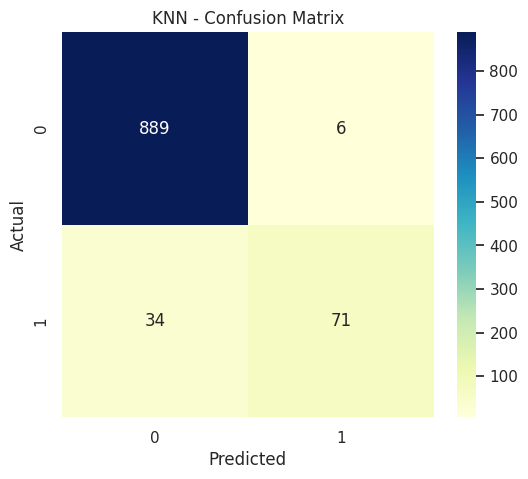


===== SVM =====
Accuracy: 0.9770
Precision: 0.9770
Recall: 0.9770
F1 Score: 0.9760
Confusion Matrix:
[[893   2]
 [ 21  84]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       0.98      0.80      0.88       105

    accuracy                           0.98      1000
   macro avg       0.98      0.90      0.93      1000
weighted avg       0.98      0.98      0.98      1000



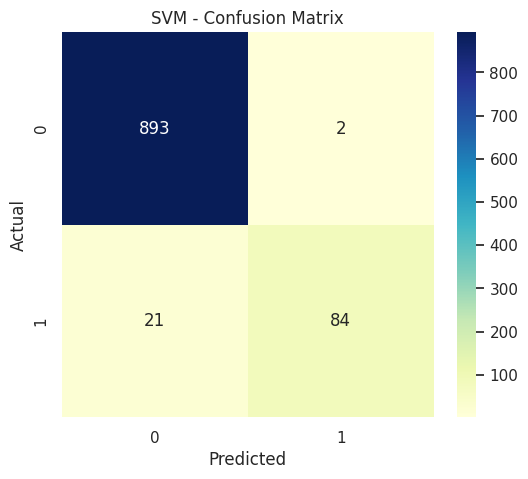


===== Logistic Regression =====
Accuracy: 0.9540
Precision: 0.9516
Recall: 0.9540
F1 Score: 0.9516
Confusion Matrix:
[[883  12]
 [ 34  71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.86      0.68      0.76       105

    accuracy                           0.95      1000
   macro avg       0.91      0.83      0.86      1000
weighted avg       0.95      0.95      0.95      1000



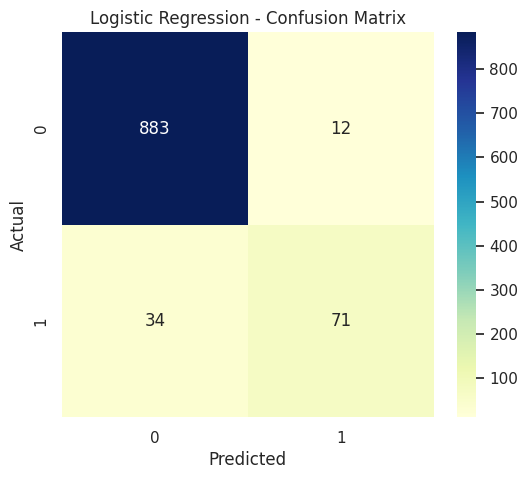


===== Naive Bayes =====
Accuracy: 0.8940
Precision: 0.9050
Recall: 0.8940
F1 Score: 0.8987
Confusion Matrix:
[[830  65]
 [ 41  64]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       895
           1       0.50      0.61      0.55       105

    accuracy                           0.89      1000
   macro avg       0.72      0.77      0.74      1000
weighted avg       0.90      0.89      0.90      1000



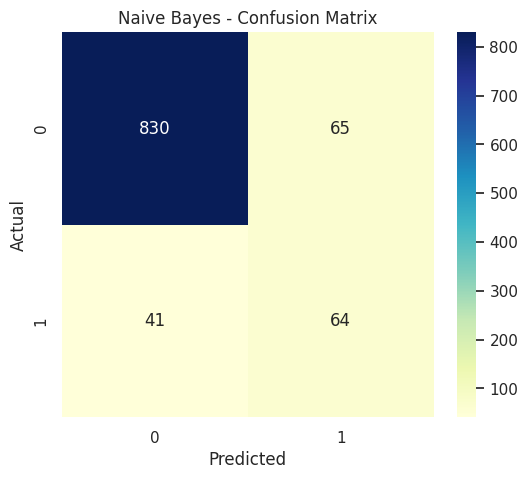


===== Decision Tree =====
Accuracy: 0.9890
Precision: 0.9889
Recall: 0.9890
F1 Score: 0.9889
Confusion Matrix:
[[891   4]
 [  7  98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.96      0.93      0.95       105

    accuracy                           0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



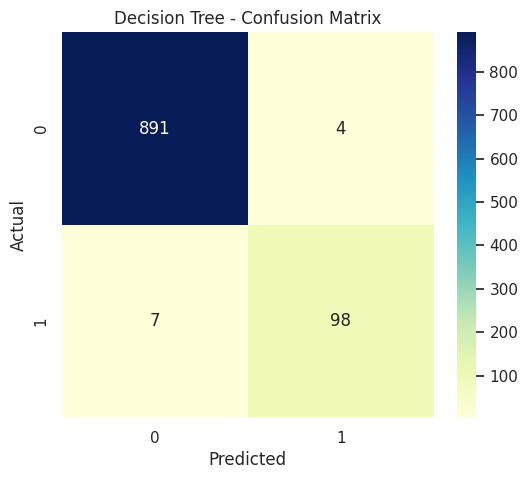


===== AdaBoost =====
Accuracy: 0.9780
Precision: 0.9780
Recall: 0.9780
F1 Score: 0.9771
Confusion Matrix:
[[893   2]
 [ 20  85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       0.98      0.81      0.89       105

    accuracy                           0.98      1000
   macro avg       0.98      0.90      0.94      1000
weighted avg       0.98      0.98      0.98      1000



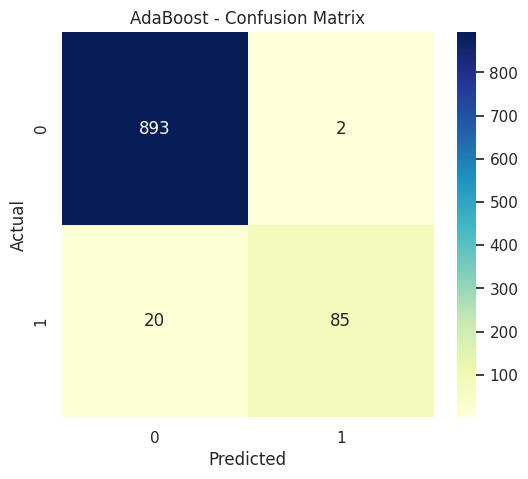


===== MLP =====
Accuracy: 0.9880
Precision: 0.9879
Recall: 0.9880
F1 Score: 0.9879
Confusion Matrix:
[[890   5]
 [  7  98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.95      0.93      0.94       105

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



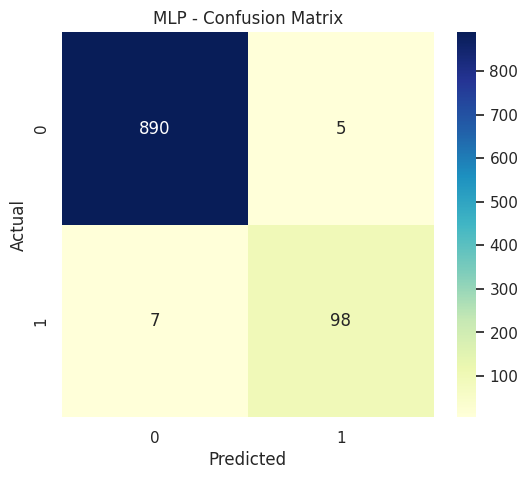

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

===== PLSTM =====
Accuracy: 0.9850
Precision: 0.9848
Recall: 0.9850
F1 Score: 0.9848
Confusion Matrix:
[[890   5]
 [ 10  95]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       895
           1       0.95      0.90      0.93       105

    accuracy                           0.98      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000



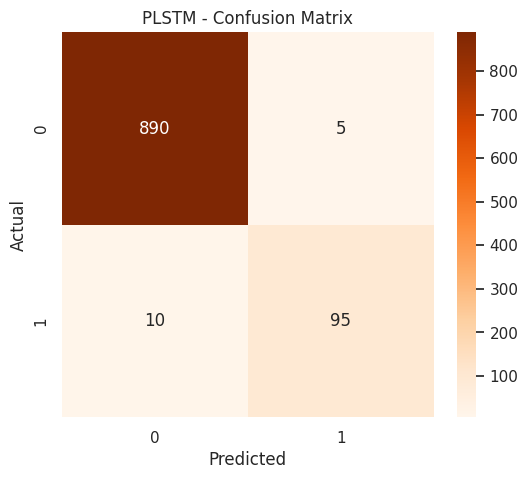

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(probability=True),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=1),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=1),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=1)
}

results = {}

# Loop through each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'Confusion Matrix': cm,
        'Report': classification_report(y_test, y_pred, output_dict=True)
    }

    print(f"\n===== {name} =====")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# === PLSTM ===

# Reshape for LSTM: (samples, timesteps, features)
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# One-hot encoding target
num_classes = len(np.unique(y_train))
y_train_lstm = to_categorical(y_train, num_classes)
y_test_lstm = to_categorical(y_test, num_classes)

plstm = Sequential()
plstm.add(LSTM(64, input_shape=(1, X_train.shape[1])))
plstm.add(Dense(num_classes, activation='softmax'))

plstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, verbose=0)

# Predict
y_pred_lstm = plstm.predict(X_test_lstm)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
y_test_classes = np.argmax(y_test_lstm, axis=1)

# Evaluation
acc = accuracy_score(y_test_classes, y_pred_lstm_classes)
prec = precision_score(y_test_classes, y_pred_lstm_classes, average='weighted')
rec = recall_score(y_test_classes, y_pred_lstm_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_lstm_classes, average='weighted')
cm = confusion_matrix(y_test_classes, y_pred_lstm_classes)

print("\n===== PLSTM =====")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_lstm_classes))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=np.unique(y_test_classes), yticklabels=np.unique(y_test_classes))
plt.title('PLSTM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

KNN Accuracy: 0.9610


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.9780


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

Logistic Regression Accuracy: 0.9540


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")

Naive Bayes Accuracy: 0.8780


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Decision Tree Accuracy: 0.9830


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=1)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada:.4f}")

AdaBoost Accuracy: 0.9660


In [ ]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(n_estimators=100, random_state=1)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb:.4f}")

LightGBM Accuracy: 0.9930


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=1)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp:.4f}")

MLP Accuracy: 0.9840


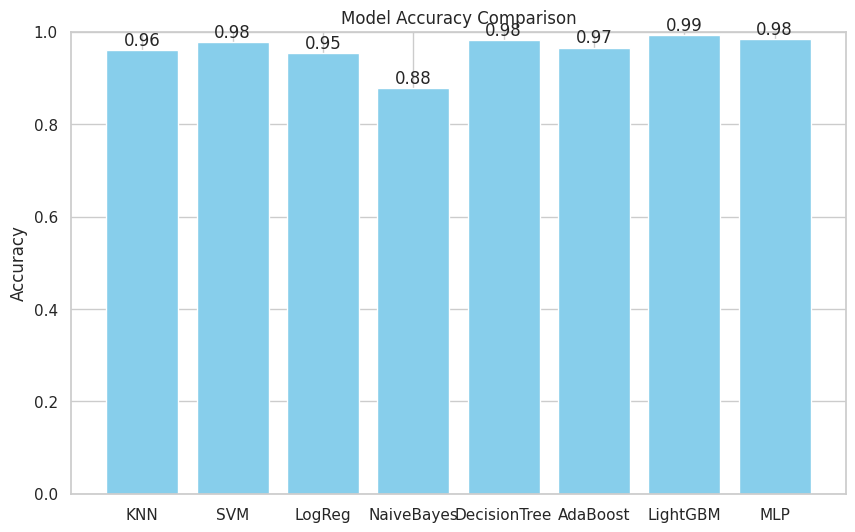

In [ ]:
import matplotlib.pyplot as plt
models = ["KNN", "SVM", "LogReg", "NaiveBayes", "DecisionTree", "AdaBoost", "MLP"]
accuracies = [accuracy_knn, accuracy_svm, accuracy_logreg, accuracy_nb, accuracy_dt, accuracy_ada, accuracy_mlp]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


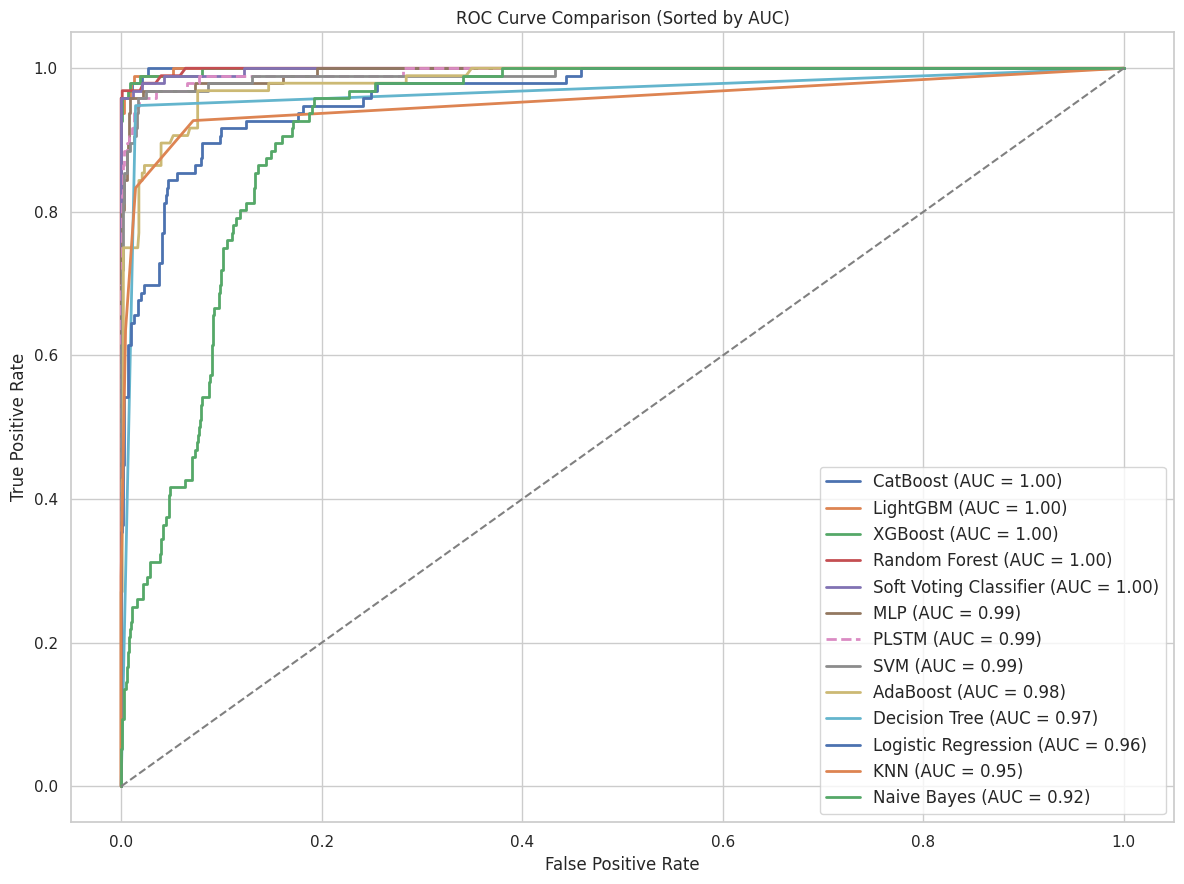

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (roc_curve, auc, accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix, classification_report)

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

df['Experience'] = df['Experience'].apply(lambda x: np.nan if x < 0 else x)
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical columns if any
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Feature-target split with proper column drop
X = df.drop(['ID', 'ZIP_Code', 'Personal_Loan'], axis=1)
y = df['Personal_Loan']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# === Deep Learning target processing ===
y_train_lstm = to_categorical(y_train)
y_test_lstm = to_categorical(y_test)

X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# === Define Models ===
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'MLP': MLPClassifier(max_iter=300),
    'LightGBM': lgb.LGBMClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'CatBoost': cb.CatBoostClassifier(verbose=0)
}

# === Voting Classifiers ===
models['Soft Voting Classifier'] = VotingClassifier(
    estimators=[
        ('lr', models['Logistic Regression']),
        ('rf', models['Random Forest']),
        ('xgb', models['XGBoost'])
    ],
    voting='soft'
)

# === Train and Collect ROC Data ===
roc_data = []
plt.figure(figsize=(12, 9))

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        roc_data.append((name, fpr, tpr, roc_auc))
    else:
        print(f"{name} does not support predict_proba, skipping ROC.")

# === PLSTM Model ===
plstm = Sequential()
plstm.add(LSTM(64, input_shape=(1, X_train.shape[1])))
plstm.add(Dense(2, activation='softmax'))
plstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
plstm.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, verbose=0)

# Predict and ROC for PLSTM
y_pred_lstm_probs = plstm.predict(X_test_lstm)
y_pred_lstm_classes = np.argmax(y_pred_lstm_probs, axis=1)
y_test_classes = np.argmax(y_test_lstm, axis=1)

fpr_lstm, tpr_lstm, _ = roc_curve(y_test_classes, y_pred_lstm_probs[:, 1])
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)
roc_data.append(('PLSTM', fpr_lstm, tpr_lstm, roc_auc_lstm))

# === Sort by AUC and Plot ===
roc_data.sort(key=lambda x: x[3], reverse=True)
for name, fpr, tpr, roc_auc in roc_data:
    linestyle = '--' if name == 'PLSTM' else '-'
    plt.plot(fpr, tpr, lw=2, linestyle=linestyle, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Sorted by AUC)')
plt.legend(loc='lower right', fontsize='medium')
plt.grid(True)
plt.tight_layout()
plt.show()